# Laboratoire 0 - Exemple

Bienvenue dans ce laboratoire d'exemple. L'objectif ici est de vous familiariser avec l'environnement Jupyter, ainsi que les interactions que vous pouvez avoir avec le robot.

Jupyter nous sert d'interface pour appeler du code python. Débutons 

In [9]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import animation
from IPython.display import HTML
from websocket_client import Robot, Sensors

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Modifiez la valeur de `ip_robot` selon le robot qui vous a été assigné.

In [10]:
ip_robot = '10.248.0.32'
robot = Robot(ip_robot)

In [11]:
robot.connect()

In [12]:
robot.listen_to(Sensors.hokuyo)

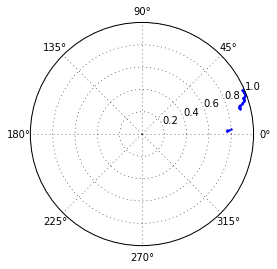

In [25]:
last_data = robot.read_sensor_data(Sensors.hokuyo)[0]['msg']
ranges = np.array(last_data['ranges'])
angles = np.arange(last_data['angle_min'], last_data['angle_max'] + last_data['angle_increment'], 
                   last_data['angle_increment'])

ranges = ranges.astype('float32')

fig, ax = plt.subplots(1,1, subplot_kw=dict(projection='polar'))
scatter_plot = ax.scatter(angles, ranges, color='b', s=2)
ax.grid(True)
ax.set_rmax(1.0)

plt.show()

In [23]:
def init_frame():
    scatter_plot.set_data([],[])
    return (scatter_plot,)

def animate(_):
    last_data = robot.read_sensor_data(Sensors.hokuyo)[0]['msg']
    ranges = np.array(last_data['ranges'])
    angles = np.arange(last_data['angle_min'], last_data['angle_max'] + last_data['angle_increment'], 
                       last_data['angle_increment'])
    
anim = animation.FuncAnimation(fig, animate, init_func=init_frame,
                                       frames=10, interval=100, blit=True)

AttributeError: 'PathCollection' object has no attribute 'set_data'